In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [36]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [37]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [38]:
df['Age'].fillna(df["Age"].mean(),inplace=True)

C:\Users\INTEL\AppData\Local\Temp\ipykernel_2676\2703313926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].mean(),inplace=True)


In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


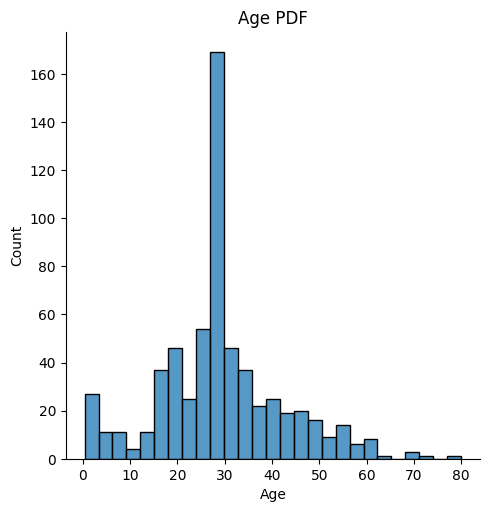

In [42]:
sns.displot(X_train['Age'])
plt.title("Age PDF")
plt.show()

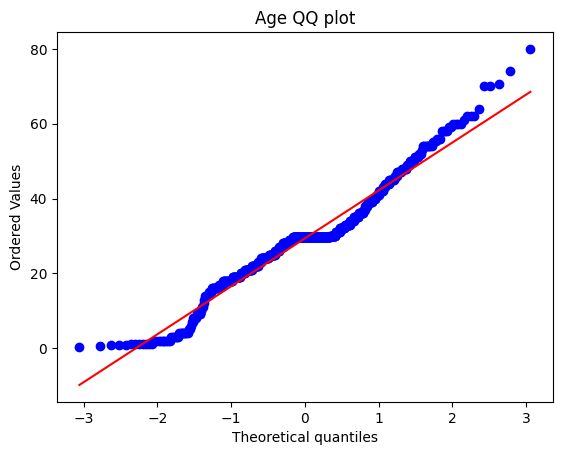

In [43]:
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ plot")
plt.show()

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\patches.py:796: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np

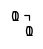

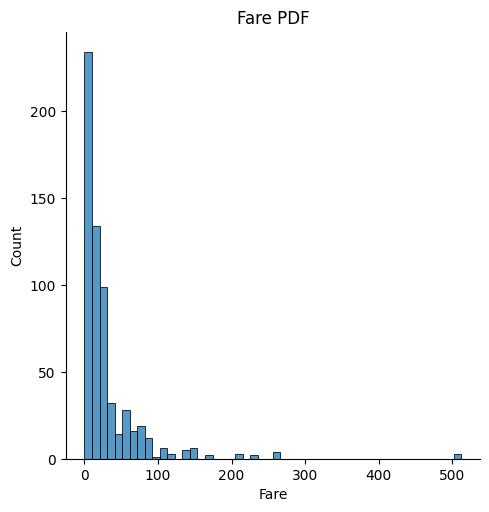

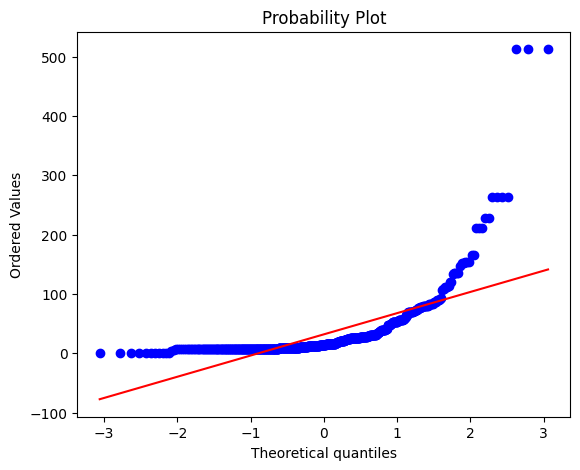

In [44]:
plt.figure(figsize=(0,0))
plt.subplot(121)
sns.displot(X_train['Fare'])
plt.title('Fare PDF')
plt.figure(figsize=(14,5))
plt.subplot(122)
stats.probplot(X_train["Fare"],dist='norm',plot=plt)
plt.show()

In [45]:
clf=LogisticRegression()
clf2 =DecisionTreeClassifier()

In [49]:
X_train.shape

(623, 2)

In [48]:
X_test.shape

(268, 2)

In [52]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Accuracy",accuracy_score(y_test,y_pred1))

Accuracy 0.6529850746268657
Accuracy 0.6753731343283582


In [59]:
trf=FunctionTransformer(func=np.log1p)

X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [60]:
clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
y_predt=clf.predict(X_test_trf)
y_predt1=clf2.predict(X_test_trf)

print("Accuracy LR",accuracy_score(y_test,y_predt))
print("Accuracy DT",accuracy_score(y_test,y_predt1))

Accuracy LR 0.6791044776119403
Accuracy DT 0.6865671641791045


In [64]:
X_transform=trf.fit_transform(X)
from sklearn.model_selection import cross_val_score


print("LR",np.mean(cross_val_score(clf,X_transform,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transform,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588639200998753


<Figure size 1200x400 with 0 Axes>

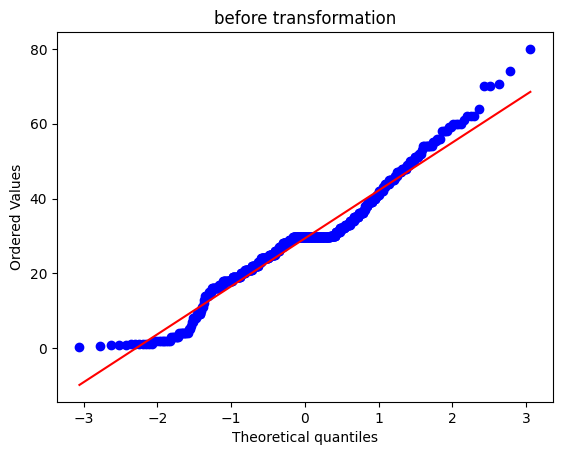

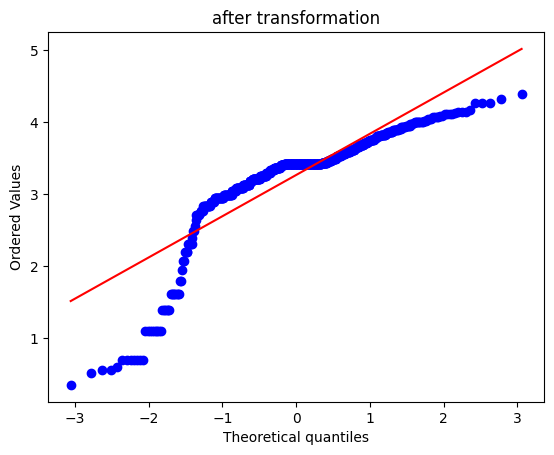

In [ ]:
plt.figure(figsize=(12,4))
plt.subplots(1)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("before transformation")

plt.subplots(1)
stats.probplot(X_train_trf['Fare'],dist='norm',plot=plt)
plt.title('after transformation')
plt.show()

<Figure size 1400x500 with 0 Axes>

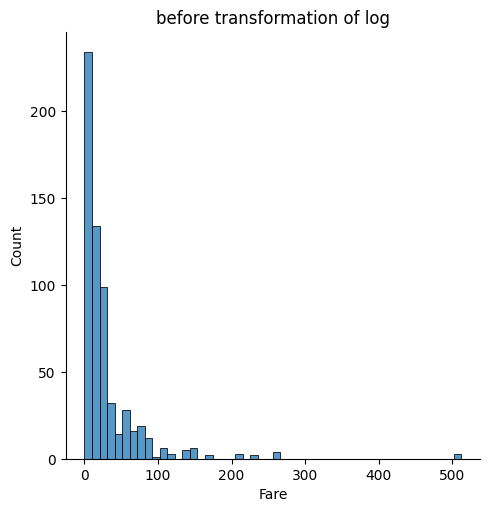

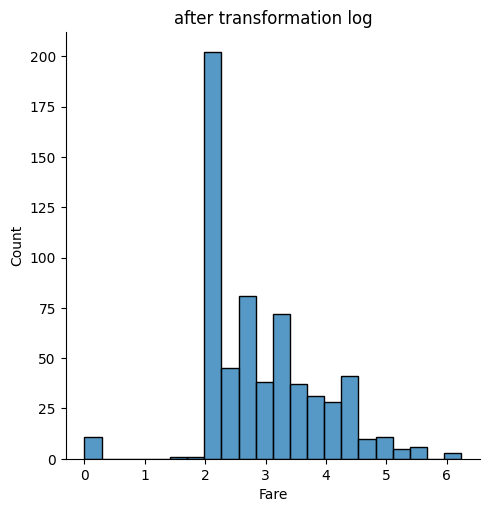

In [74]:
plt.figure(figsize=(14,5))

sns.displot(X_train["Fare"])
plt.title("before transformation of log")

sns.displot(X_train_trf['Fare'])
plt.title('after transformation log')
plt.show()

In [86]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_trf2=trf2.fit_transform(X_train)
X_test_trf2=trf2.transform(X_test)

In [87]:


clf.fit(X_train_trf2,y_train)
clf2.fit(X_train_trf2,y_train)


y_pred2=clf.predict(X_test_trf2)
y_predt2=clf2.predict(X_test_trf2)

print("LR",accuracy_score(y_test,y_pred2))
print("DT",accuracy_score(y_test,y_predt2))

LR 0.664179104477612
DT 0.6716417910447762
